In [15]:
import pandas as pd
import numpy as np

Hillary2016_11_12 = pd.read_csv("../raw_data/2016_Hillary.csv")
Hillary2017_01_03 = pd.read_excel("../raw_data/2017_Hillary.xlsx")

/Users/junjiexie/opt/anaconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [16]:
Hillary2017_01_03.rename(columns={"data.created_at": "created_at", "data.id": "id", "data.text": "text"}, inplace=True)

In [17]:
# bind Data from R api and data from Python api together
allHillaryData = pd.concat([Hillary2017_01_03, Hillary2016_11_12])

In [18]:
# text-clean
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


# clean text data and finish the preprocess

def first_clean(text):
    rawData = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    return rawData.split()


def bind_together(input):
    return [i for item in input for i in item]


def clean_not_words(input):
    english_words = set(nltk.corpus.words.words())
    return [i for i in input if i in english_words]


text = [i for i in allHillaryData.loc[:, "text"]]

first_clean_words = bind_together([first_clean(i) for i in text])

second_clean_words = [w for w in first_clean_words if w not in stopwords.words('english')]

need_english_words = clean_not_words(second_clean_words)

# stemmed = [PorterStemmer().stem(w) for w in need_english_words]

lemmed = [WordNetLemmatizer().lemmatize(w) for w in need_english_words]

In [19]:
# use CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(lemmed)

CountVectorizer()

In [20]:
# show vocabularies

print("vocabularies size:{}".format(len(vect.vocabulary_)))
print("vocabularies content:\n {}".format(vect.vocabulary_))

vocabularies size:418
vocabularies content:
 {'trump': 369, 'confirmed': 63, 'weekend': 397, 'ban': 16, 'enhance': 103, 'security': 310, 'fear': 125, 'resentment': 293, 'hate': 160, 'rise': 298, 'tell': 347, 'part': 252, 'must': 229, 'step': 336, 'speak': 329, 'chair': 48, 'deputy': 81, 'excited': 114, 'strong': 342, 'unified': 377, 'party': 254, 'standing': 334, 'best': 25, 'country': 72, 'future': 142, 'let': 203, 'resistance': 294, 'plus': 263, 'persistence': 256, 'equal': 107, 'progress': 271, 'message': 221, 'today': 358, 'stand': 333, 'heat': 164, 'get': 143, 'congress': 64, 'cemetery': 47, 'desecration': 82, 'troubling': 367, 'need': 232, 'stopped': 339, 'everyone': 111, 'starting': 335, 'global': 147, 'health': 161, 'want': 391, 'feed': 126, 'inner': 182, 'check': 52, 'wonderful': 406, 'daughter': 73, 'new': 235, 'book': 32, 'thanks': 351, 'fair': 120, 'inspiring': 183, 'song': 326, 'watch': 392, 'got': 151, 'way': 395, 'saying': 305, 'point': 264, 'real': 284, 'fake': 123, 'ne

In [21]:
vect.get_feature_names()

['across',
 'act',
 'afraid',
 'ahead',
 'almost',
 'along',
 'already',
 'always',
 'amazing',
 'anybody',
 'anyone',
 'arc',
 'aspire',
 'awe',
 'back',
 'ballot',
 'ban',
 'basically',
 'battleground',
 'beat',
 'beautiful',
 'behalf',
 'believe',
 'believing',
 'bend',
 'best',
 'better',
 'betting',
 'big',
 'bigotry',
 'bill',
 'boo',
 'book',
 'booth',
 'boy',
 'brave',
 'bring',
 'broken',
 'brought',
 'build',
 'call',
 'came',
 'campaign',
 'candidate',
 'career',
 'cast',
 'ceiling',
 'cemetery',
 'chair',
 'champion',
 'chance',
 'change',
 'check',
 'choice',
 'choose',
 'city',
 'class',
 'clear',
 'climate',
 'close',
 'college',
 'come',
 'confirm',
 'confirmed',
 'congress',
 'constitution',
 'constitutional',
 'continued',
 'contribute',
 'corner',
 'could',
 'count',
 'country',
 'daughter',
 'day',
 'debt',
 'deeply',
 'delighted',
 'deliver',
 'democracy',
 'democrat',
 'deputy',
 'desecration',
 'deserving',
 'determination',
 'determined',
 'difference',
 'discri

In [22]:
# transfer word frequency table
from collections import Counter


def transfer_df(lemmed: list):
    word_frequency = Counter(lemmed)
    storage = []
    for key, value in word_frequency.items():
        storage.append([key, value])
    return pd.DataFrame(storage)


df_word_frequency = transfer_df(lemmed)

In [23]:
df_word_frequency.columns = ["word", "frequency"]
df_word_frequency.sort_values("frequency", inplace=True, ascending=False)

## word frequency count top 10

In [10]:
# show the top 10 most frequent word
df_word_frequency[:10]

,word,frequency
250,vote,33
32,today,19
23,country,17
74,u,14
25,let,14
161,go,12
211,president,11
166,day,11
223,election,10
107,believe,10


In [25]:
df_word_frequency.to_csv("../data/Hillary_word_frequency.csv")

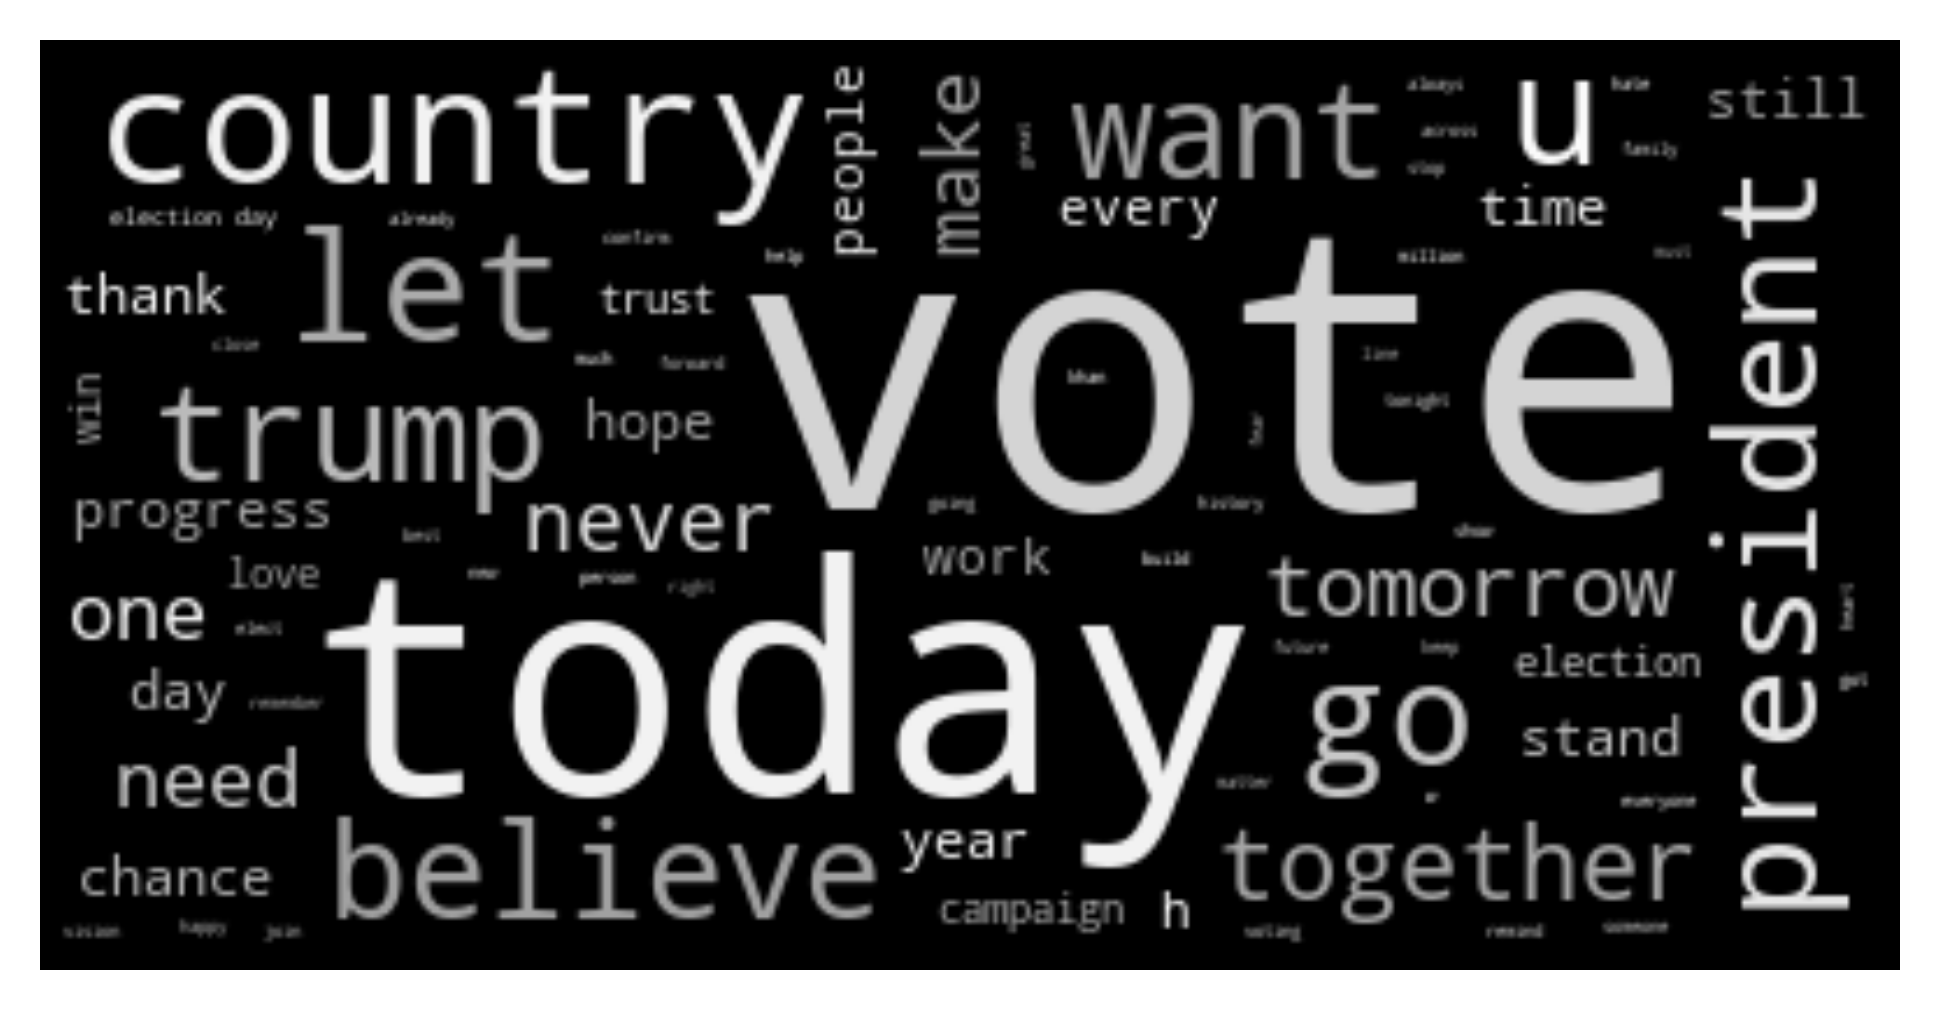

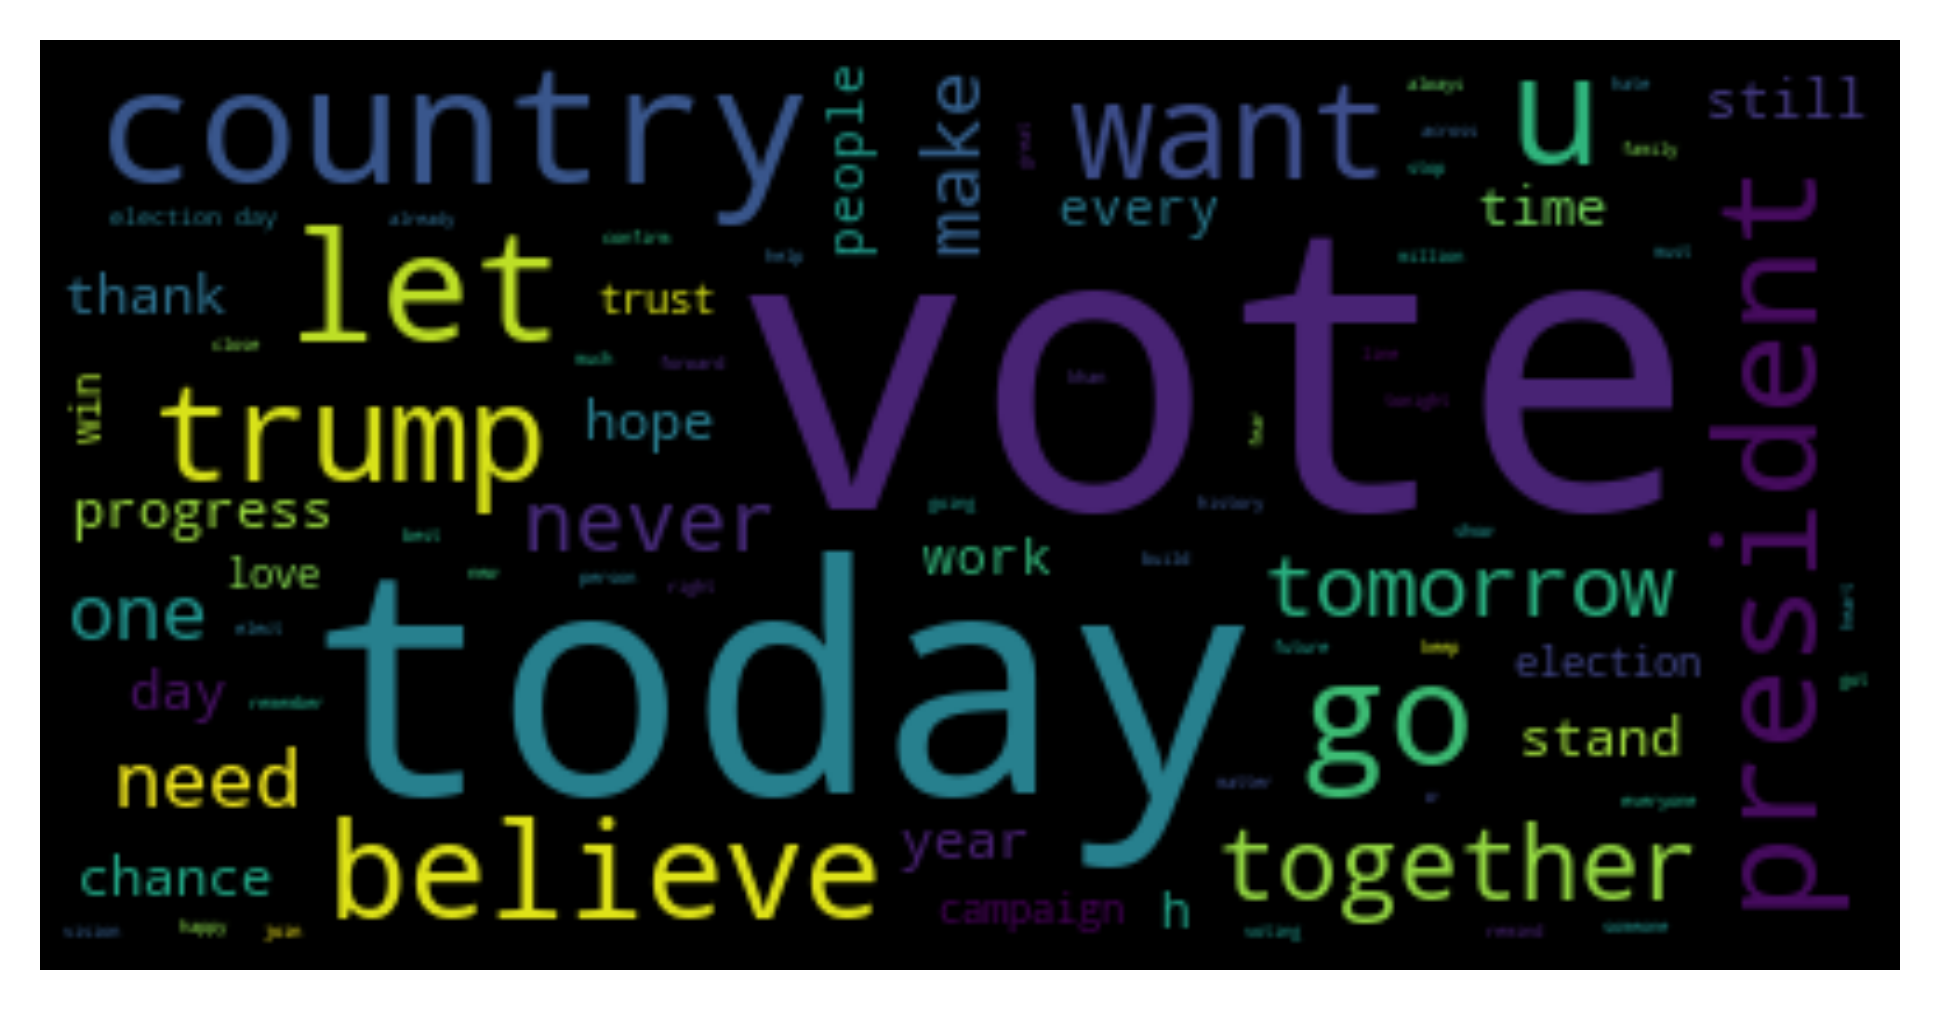

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random


def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)


wc = WordCloud(max_words=1000, margin=10,
               random_state=1).generate(" ".join(lemmed))
# store default colored image
plt.rcParams['savefig.dpi'] = 1600  #图片像素
plt.rcParams['figure.dpi'] = 400  #分辨率
default_colors = wc.to_array()
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
           interpolation="bilinear")
plt.axis("off")
plt.figure()
plt.imshow(default_colors, interpolation="bilinear")
plt.axis("off")
plt.show()




In [12]:
# LDA topic analysis

from sklearn.feature_extraction.text import CountVectorizer
import mglearn

vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(lemmed)

In [16]:
from sklearn.decomposition import LatentDirichletAllocation

lda = LatentDirichletAllocation(learning_method="batch", max_iter=25, random_state=0)

In [19]:
document_topics = lda.fit_transform(X)

sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names, sorting=sorting, topics_per_chunk=5,
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
together      need          let           vote          make          
every         hope          want          work          stop          
family        people        progress      tonight       hate          
million       build         best          elect         little        
everyone      ever          matter        khan          standing      
help          ahead         someone       democracy     nuclear       
future        thanks        thinking      young         full          
already       ballot        tell          rally         new           
across        could         speak         believing     free          
right         powerful      betting       made          candidate     


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
toda

In [41]:
# sentiment analysis

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# positive sentiment: compound score >= 0.05
# neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
# negative sentiment: compound score <= -0.05

sentimentAnalyze = []

analyzer = SentimentIntensityAnalyzer()
for sentence in text:
    vs = analyzer.polarity_scores(sentence)
    # print("{:-<65} {}".format(sentence, str(vs)))
    sentimentAnalyze.append(str(vs["compound"]))



In [44]:
df_sentiment = pd.DataFrame([[i, j] for i, j in zip(text, sentimentAnalyze)])
df_sentiment.columns = ["sentence", "sentiment"]
df_sentiment.sentiment = df_sentiment.sentiment.astype("float")
print("the percent of positive sentiment of Hillary tweet is {}%".format((
                                                                                 len(df_sentiment[
                                                                                         df_sentiment.sentiment > 0.05]) / len(
                                                                             df_sentiment)) * 100))
print("the percent of neutral sentiment of Hillary tweet is {}%".format((
                                                                                len(df_sentiment[
                                                                                        abs(df_sentiment.sentiment) < 0.05]) / len(
                                                                            df_sentiment)) * 100))
print("the percent of negative sentiment of Hillary tweet is {}%".format((
                                                                                 len(df_sentiment[
                                                                                         df_sentiment.sentiment < -0.05]) / len(
                                                                             df_sentiment)) * 100))

the percent of negative sentiment of Hillary tweet is 58.91472868217055%
the percent of neutral sentiment of Hillary tweet is 27.131782945736433%
the percent of negative sentiment of Hillary tweet is 13.953488372093023%


10